## **Assignment 01**

#### **01. Intensity Transformation**

In [2]:
#Import Essential Librariers
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

256


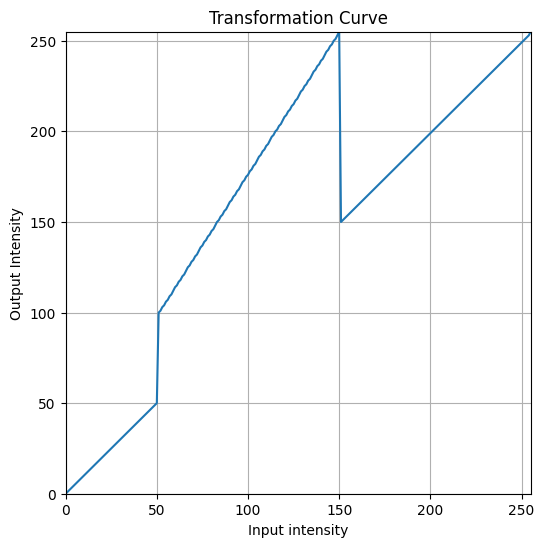

In [3]:
#Declare the control points in an array
c = np.array([50, 100, 150, 200])

#Generating the loockup table segments for transformation
t1 = np.arange(c[0]+1, dtype=np.uint8)
t2 = np.linspace(c[1], 255 , c[2]-c[0]).astype('uint8')
t3 = np.linspace(c[2], 255, 255-c[2]).astype('uint8')

transform = np.concatenate((t1,t2,t3))
print(len(transform))
plt.figure(figsize=(6,6))
plt.plot(range(len(transform)), transform)
plt.title("Transformation Curve")
plt.xlabel("Input intensity")
plt.ylabel("Output Intensity")
plt.xlim(0, 255)
plt.ylim(0, 255)
plt.grid('true')

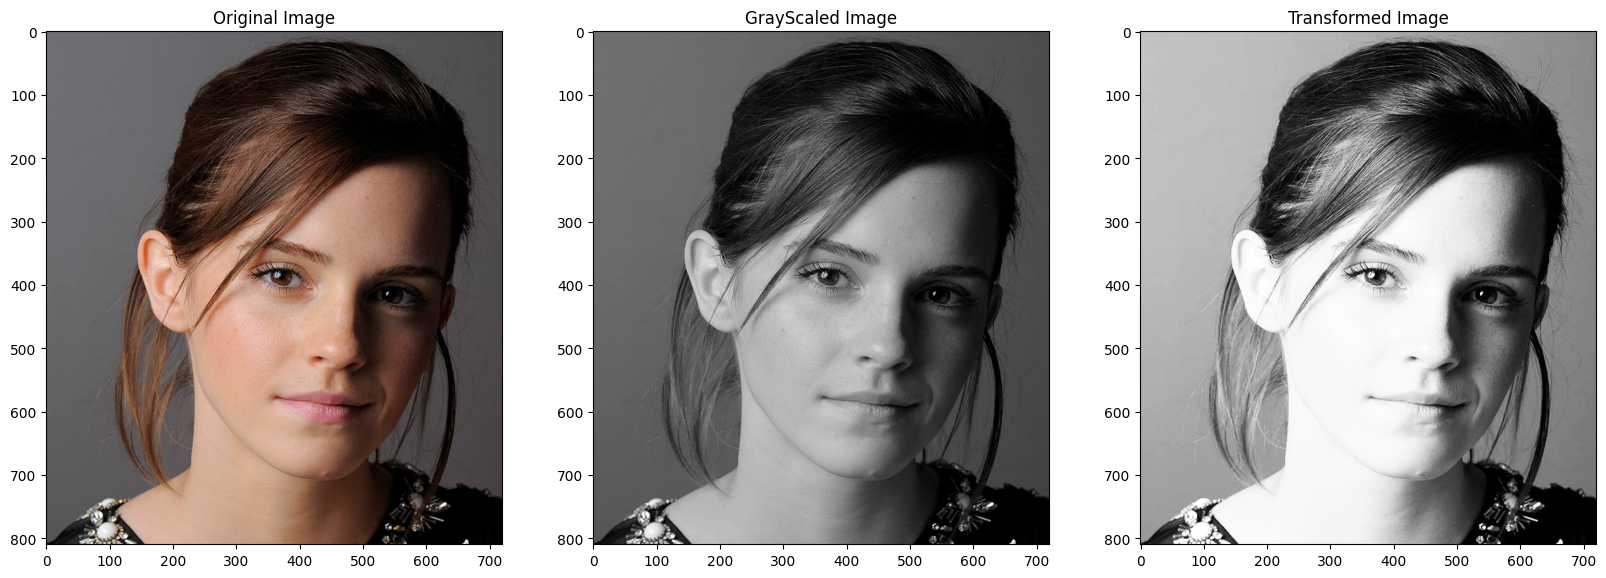

True

In [ ]:
#Read the image
img_original = cv.imread("a1images/a1images/emma.jpg",cv.IMREAD_COLOR)
img_grayscale = cv.imread("a1images/a1images/emma.jpg",cv.IMREAD_GRAYSCALE)

img_transformed = cv.LUT(img_grayscale, transform)

plt.figure(figsize=(20,15))

plt.subplot(1,3,1)
plt.imshow(img_original[:,:,::-1])
plt.title("Original Image")

plt.subplot(1,3,2)
plt.imshow(img_grayscale, cmap='gray')
plt.title("GrayScaled Image")

plt.subplot(1,3,3)
plt.imshow(img_transformed, cmap='gray')
plt.title("Transformed Image")

plt.show()

cv.imwrite("Output_images/emma_transformed.jpg",img_transformed)

#### **02. Accentuate White Matter and Gray Matter**

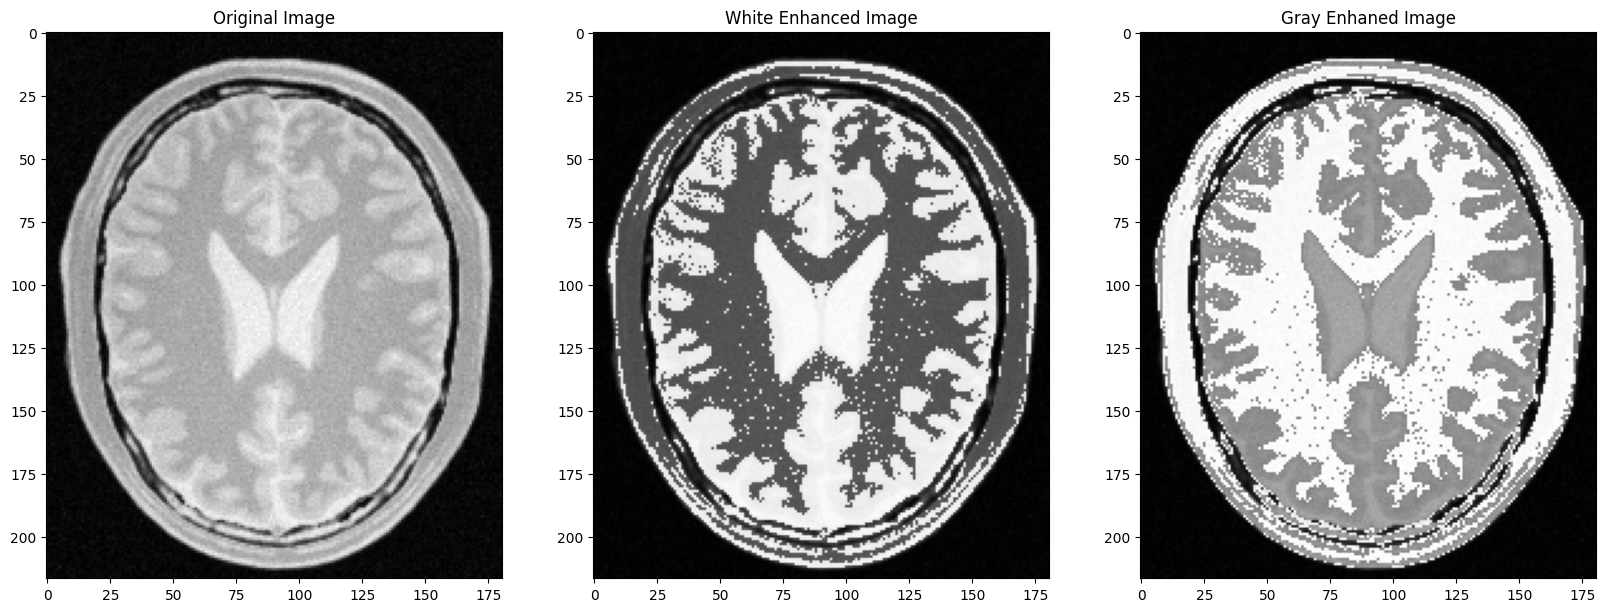

In [20]:
#Generate LUT to Accentuate white matter
t1=(np.arange(181)*0.5).astype(np.uint8)
t2=np.linspace(230,255,255-180)
transform_white=np.concatenate((t1,t2))

#Generate LUT for Accentuate Gray matter
t_1=(np.arange(111)*0.5).astype(np.uint8)
t_2=np.linspace(230,255,180-110)
t_3=np.linspace(130,180,255-180)
transform_gray=np.concatenate((t_1,t_2,t_3))

#Read the image
brain_img = cv.imread("a1images/a1images/brain_proton_density_slice.png",0)

enhance_white = cv.LUT(brain_img, transform_white)
enhance_gray = cv.LUT(brain_img, transform_gray)

#Display Images
plt.figure(figsize=(20,15))

plt.subplot(1,3,1)
plt.imshow(brain_img, cmap='gray')
plt.title("Original Image")

plt.subplot(1,3,2)
plt.imshow(enhance_white, cmap='gray')
plt.title("White Enhanced Image")

plt.subplot(1,3,3)
plt.imshow(enhance_gray, cmap='gray')
plt.title("Gray Enhaned Image")

#save the images
cv.imwrite("Output_images/white_enhanced_brain_image.png", enhance_white)
cv.imwrite("Output_images/gray_enhanced_brain_image.png", enhance_gray)

plt.show()

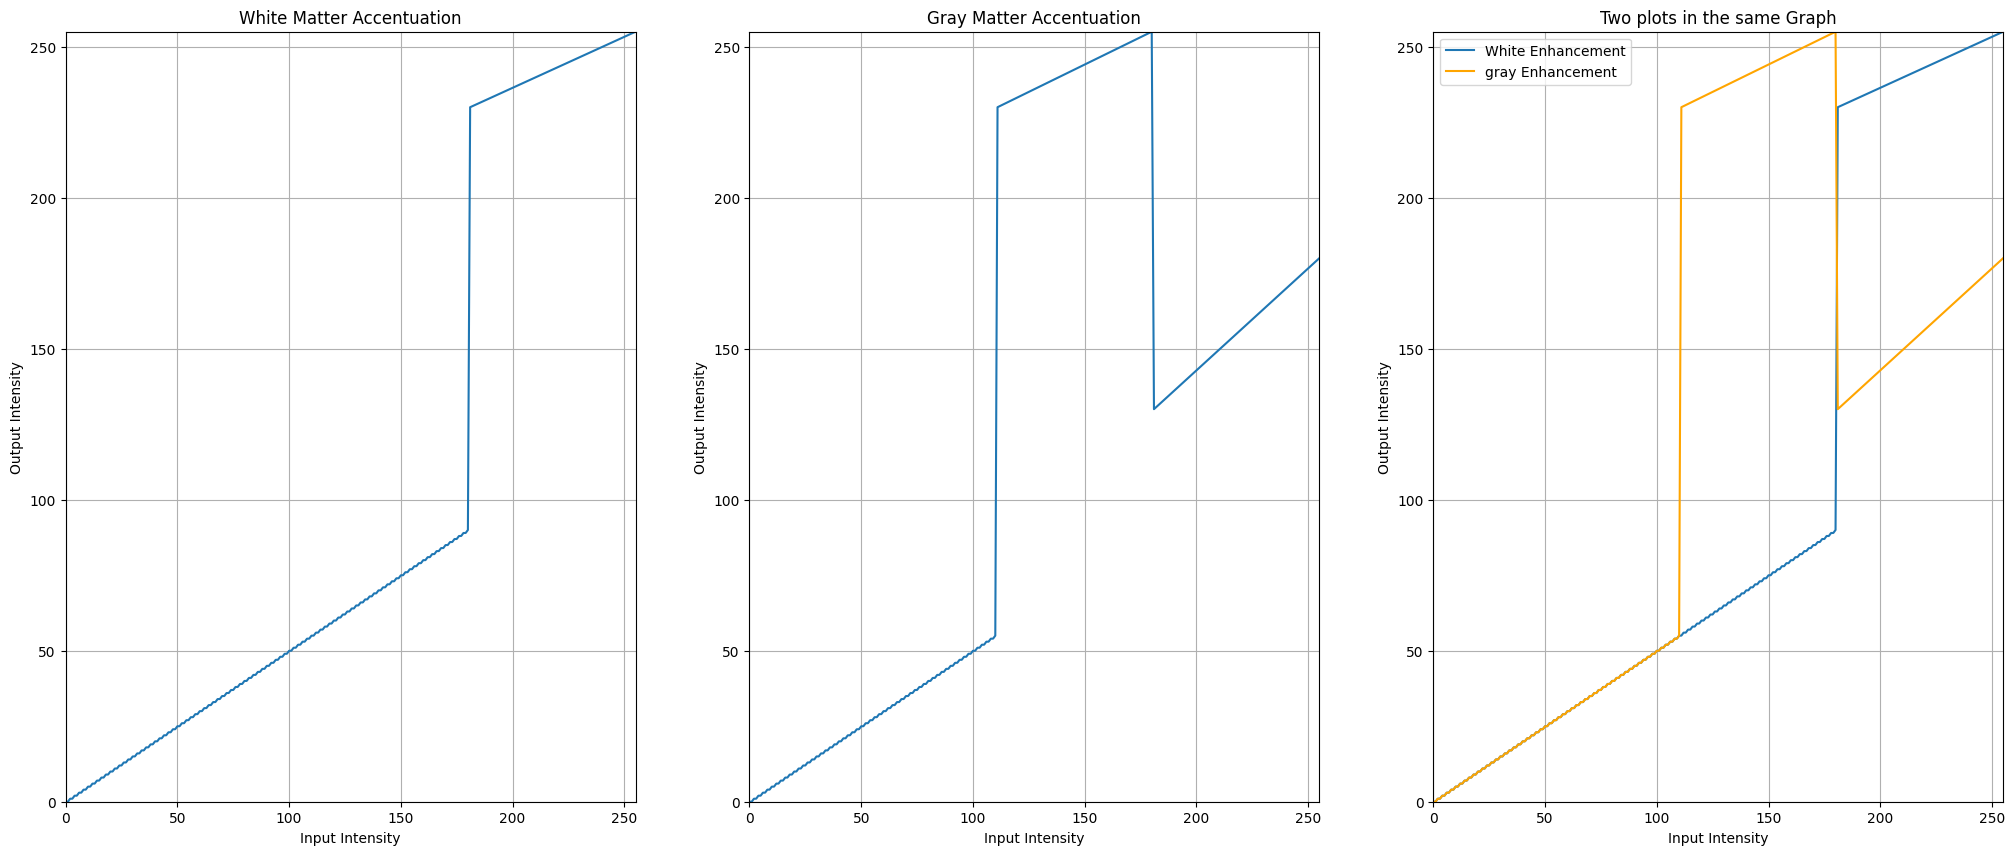

In [6]:
#Plot the transformation Curves
x_vals = np.arange(256)

plt.figure(figsize=(25,10))

plt.subplot(1, 3, 1)
plt.plot(x_vals, transform_white)
plt.title("White Matter Accentuation")
plt.xlabel("Input Intensity")
plt.ylabel("Output Intensity")
plt.xlim(0, 255)
plt.ylim(0, 255)
plt.grid(True)

# Plot Gray Matter LUT
plt.subplot(1, 3, 2)
plt.plot(x_vals, transform_gray)
plt.title("Gray Matter Accentuation")
plt.xlabel("Input Intensity")
plt.ylabel("Output Intensity")
plt.xlim(0, 255)
plt.ylim(0, 255)
plt.grid(True)

#Plot 2 graphs in the same plot
plt.subplot(1, 3, 3)
plt.plot(x_vals, transform_white, label='White Enhancement')
plt.plot(x_vals, transform_gray, label='gray Enhancement', color='orange')
plt.title("Two plots in the same Graph")
plt.xlabel("Input Intensity")
plt.ylabel("Output Intensity")
plt.legend()
plt.xlim(0, 255)
plt.ylim(0, 255)
plt.grid(True)

#### **03. Gamma Correction**

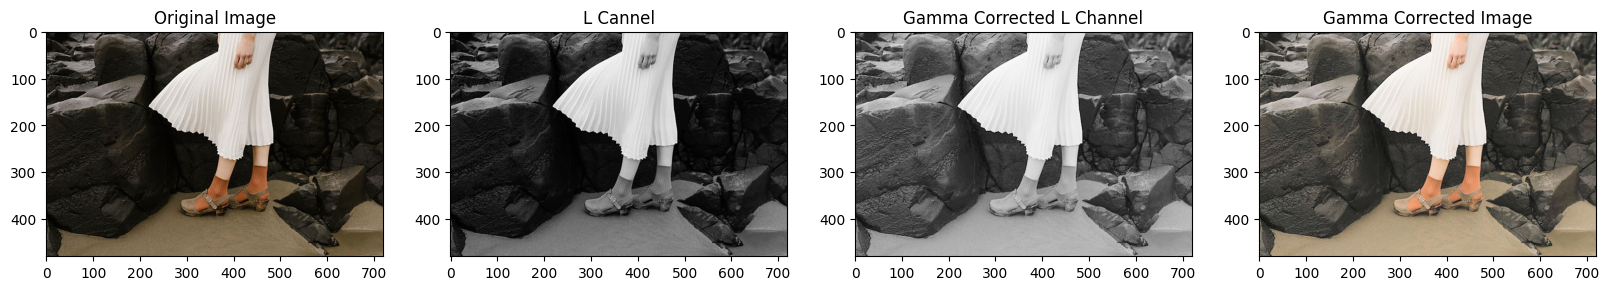

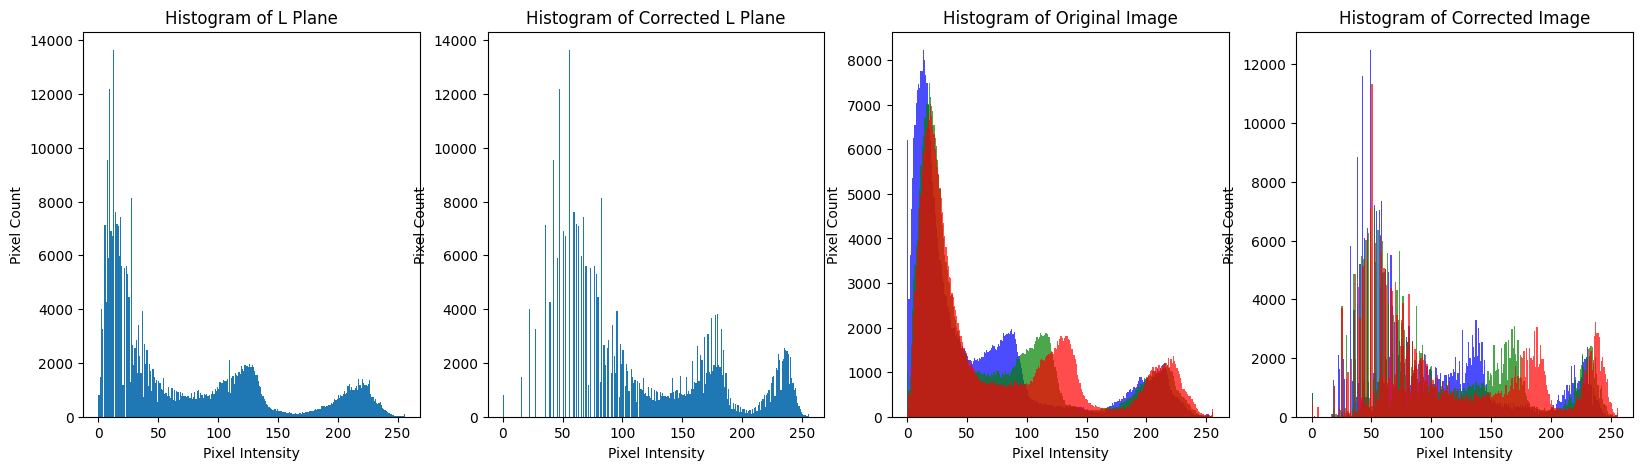

In [19]:
#Read the image
gamma_img = cv.imread("a1images/a1images/highlights_and_shadows.jpg")
#Convert it to the Lab Colorspace
gamma_img_lab = cv.cvtColor(gamma_img, cv.COLOR_BGR2LAB)
#Split the color planes
L,a,b = cv.split(gamma_img_lab)

plt.figure(figsize=(20, 5))
plt.subplot(141); plt.imshow(gamma_img[:,:,::-1]); plt.title("Original Image") 
plt.subplot(142); plt.imshow(L, cmap='gray'); plt.title('L Cannel')

#Gamma correction for L plane
gamma = 0.5
L_corrected = ((L/255)**gamma*255).astype(np.uint8)

plt.subplot(143); plt.imshow(L_corrected, cmap='gray'); plt.title('Gamma Corrected L Channel')

img_corrected = cv.merge((L_corrected,a,b))
gamma_corrected_bgr = cv.cvtColor(img_corrected, cv.COLOR_LAB2BGR)
plt.subplot(144); plt.imshow(gamma_corrected_bgr[:,:,::-1]); plt.title('Gamma Corrected Image')
cv.imwrite("Output_images/gammaCorrected.jpg", gamma_corrected_bgr) 

#Histograms
plt.figure(figsize=(20,5))
plt.subplot(141)
plt.hist(L.flatten(), bins=256, range=(0,256))
plt.title("Histogram of L Plane")
plt.xlabel("Pixel Intensity")
plt.ylabel("Pixel Count")

plt.subplot(142)
plt.hist(L_corrected.flatten(), bins=256, range=(0,256))
plt.title("Histogram of Corrected L Plane")
plt.xlabel("Pixel Intensity")
plt.ylabel("Pixel Count")


colors = ('b', 'g', 'r')
plt.subplot(143)
for i, col in enumerate(colors):
  plt.hist(gamma_img[:,:,i].flatten(), bins=256, range=(0,256), color=col, alpha=0.7)
plt.title("Histogram of Original Image")
plt.xlabel("Pixel Intensity")
plt.ylabel("Pixel Count")

plt.subplot(144)
for i, col in enumerate(colors):
  plt.hist(gamma_corrected_bgr[:,:,i].flatten(), bins=256, range=(0,256), color= col, alpha=0.7)
plt.title("Histogram of Corrected Image")
plt.xlabel("Pixel Intensity")
plt.ylabel("Pixel Count")

plt.show()



#### **04. Increase Vibrance**

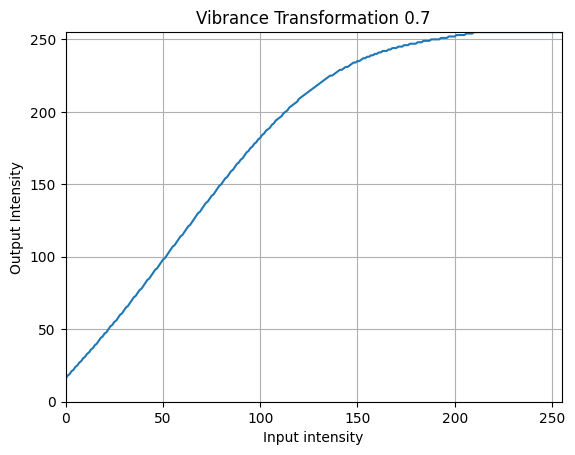

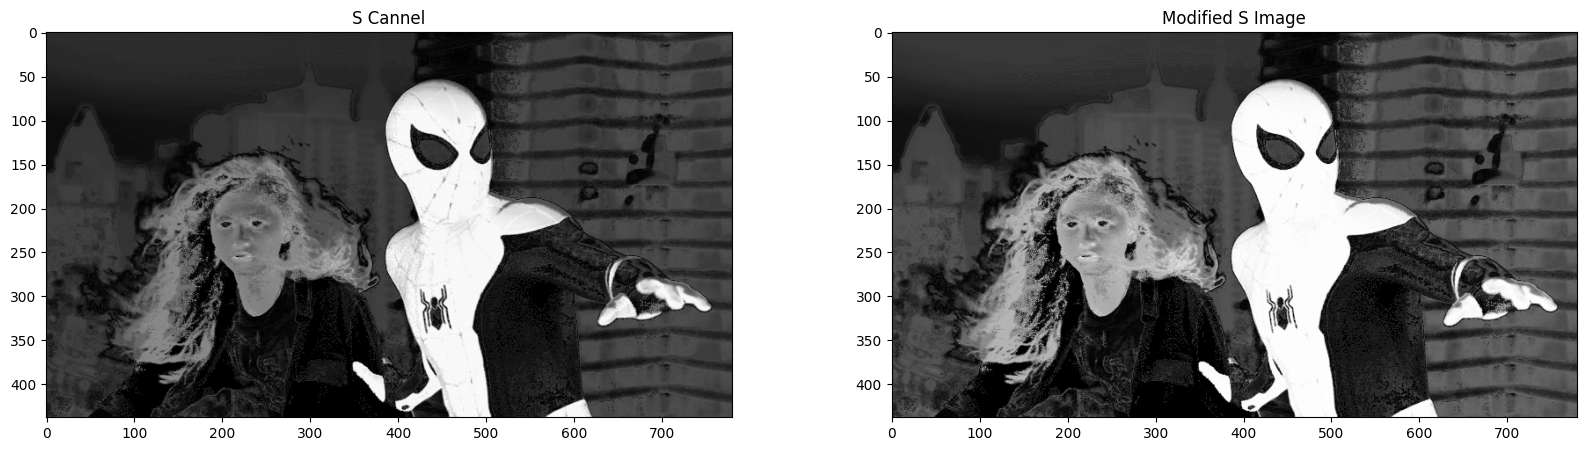

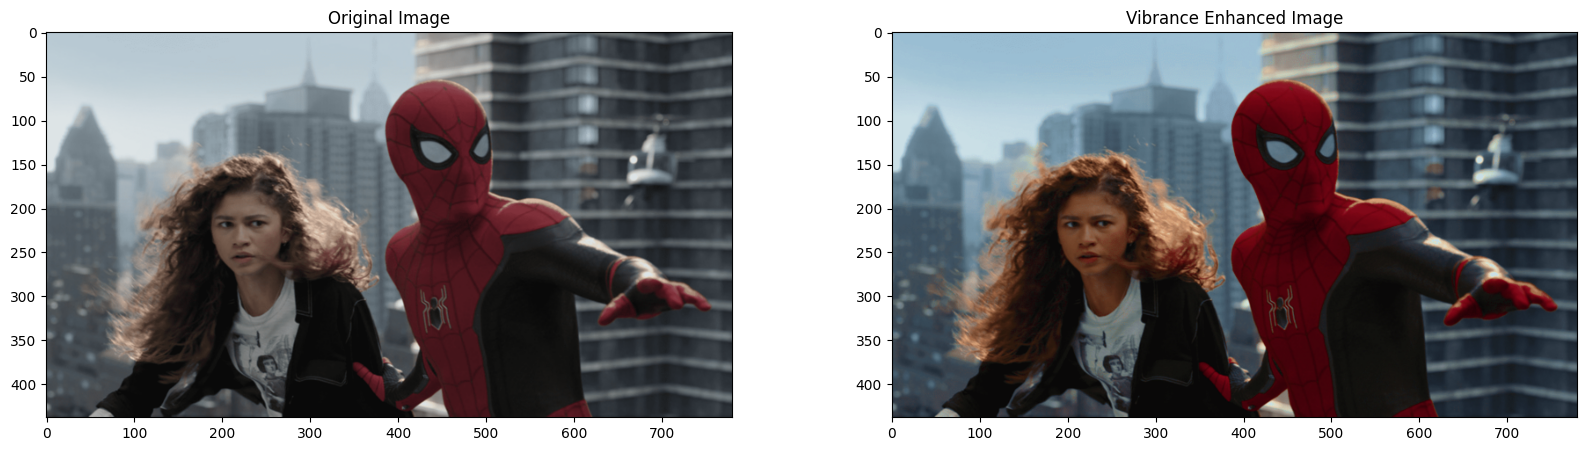

In [18]:
#Read the image and split it into h,s,v planes
spiderman_img = cv.imread('a1images/a1images/spider.png')
spiderman_img_hsv = cv.cvtColor(spiderman_img, cv.COLOR_BGR2HSV)
h, s, v = cv.split(spiderman_img_hsv)

a = 0.7  #Between [0,1]
zigma = 70
x = np.arange(0,256)
transform = np.minimum((x + a*128*np.exp(-(x-128)**2/(2*zigma**2))),255).astype(np.uint8)
plt.plot(range(256), transform)
plt.title(f'Vibrance Transformation {a}')
plt.xlabel("Input intensity")
plt.ylabel("Output Intensity")
plt.xlim(0, 255)
plt.ylim(0, 255)
plt.grid('true')

s_modified = cv.LUT(s, transform)
spider_modified = cv.merge((h, s_modified, v))
spider_modified_bgr = cv.cvtColor(spider_modified, cv.COLOR_HSV2BGR)

plt.figure(figsize=(20, 5)) 
plt.subplot(121); plt.imshow(s, cmap='gray'); plt.title('S Cannel')
plt.subplot(122); plt.imshow(s_modified, cmap='gray'); plt.title("Modified S Image") 

plt.figure(figsize=(20, 5))
plt.subplot(121); plt.imshow(spiderman_img[:,:,::-1]); plt.title("Original Image")
plt.subplot(122); plt.imshow(spider_modified_bgr[:,:,::-1]); plt.title('Vibrance Enhanced Image')

plt.show()


#### **05. Custom Histogram Equalization**

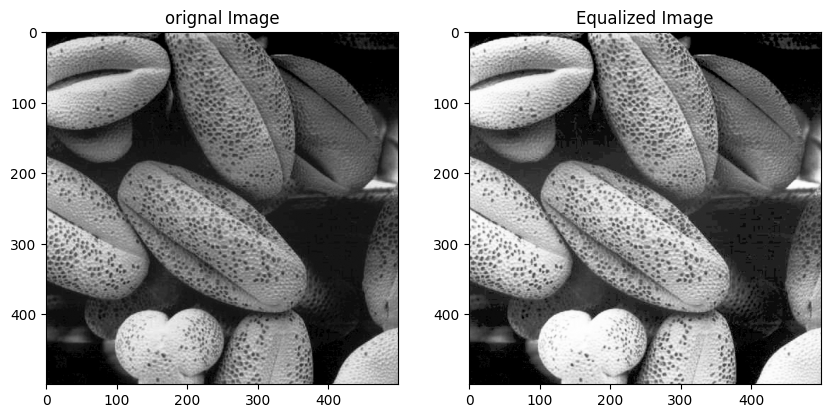

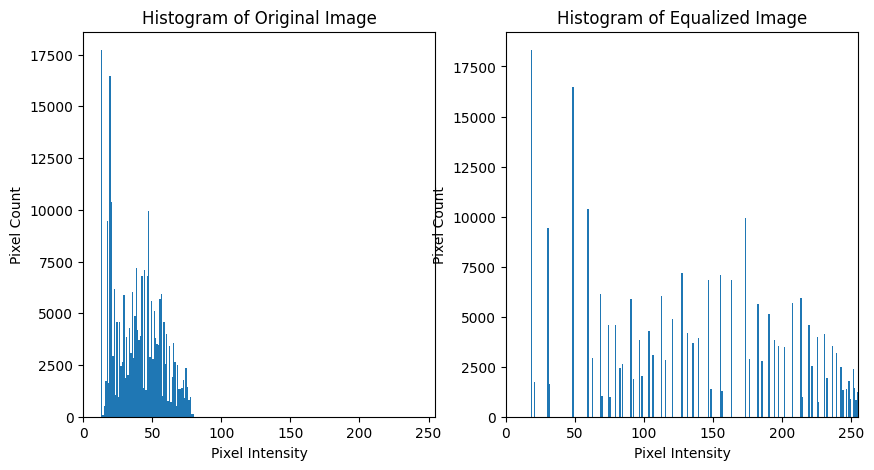

In [72]:
def histogram_equalization(img):
  '''Function to perform histogram equalization.
  Argument should be a grayscale image as a numpy array'''
  hist = np.zeros(256)
  for pixel_val in img.flatten():
    hist[pixel_val] += 1
  transform = (255*np.cumsum(hist) / img.size).astype(np.uint8)
  return transform[img]


image = cv.imread('a1images/a1images/shells.tif', 0)

equalized_img = histogram_equalization(image)

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(image, cmap='gray')
plt.title("orignal Image")

plt.subplot(1,2,2)
plt.imshow(equalized_img, cmap='gray')
plt.title("Equalized Image")

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.hist(image.flatten(), bins=256, range=(0,256))
plt.title("Histogram of Original Image")
plt.xlabel("Pixel Intensity")
plt.ylabel("Pixel Count")
plt.xlim(0, 255)

plt.subplot(1,2,2)
plt.hist(equalized_img.flatten(), bins=256, range=(0,256))
plt.title("Histogram of Equalized Image")
plt.xlabel("Pixel Intensity")
plt.ylabel("Pixel Count")
plt.xlim(0, 255)

plt.show()

#### **06. Histogram Equalizarion to the Foreground**

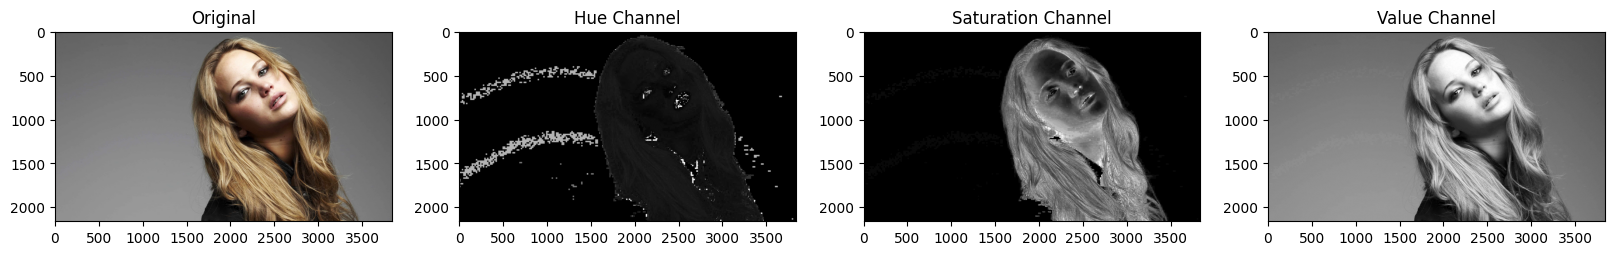

In [28]:
#Read image and split into H, S, V components
img_jeniffer = cv.imread("a1images/a1images/jeniffer.jpg")
img_jeniffer_hsv = cv.cvtColor(img_jeniffer, cv.COLOR_BGR2HSV)
H, S, V = cv.split(img_jeniffer_hsv)

# Display the H, S, V components
plt.figure(figsize=(20, 5))
plt.subplot(141); plt.imshow(img_jeniffer[:,:,::-1]); plt.title('Original')
plt.subplot(142); plt.imshow(H, cmap='gray'); plt.title('Hue Channel')
plt.subplot(143); plt.imshow(S, cmap='gray'); plt.title('Saturation Channel')
plt.subplot(144); plt.imshow(V, cmap='gray'); plt.title('Value Channel')

plt.show()

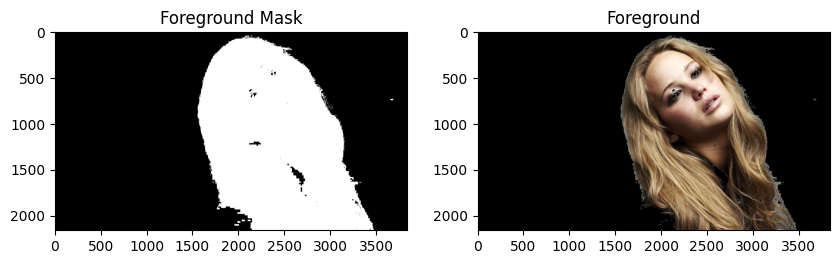

In [51]:
#Create a foregrond mask by selecting a threshold
_, mask = cv.threshold(S, 11, 255, cv.THRESH_BINARY)

#Foreground 
foreground = cv.bitwise_and(img_jeniffer, img_jeniffer, mask=mask)

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(mask, cmap='gray')
plt.title('Foreground Mask')

plt.subplot(1,2,2)
plt.imshow(foreground[:,:,::-1])
plt.title('Foreground')

plt.show()

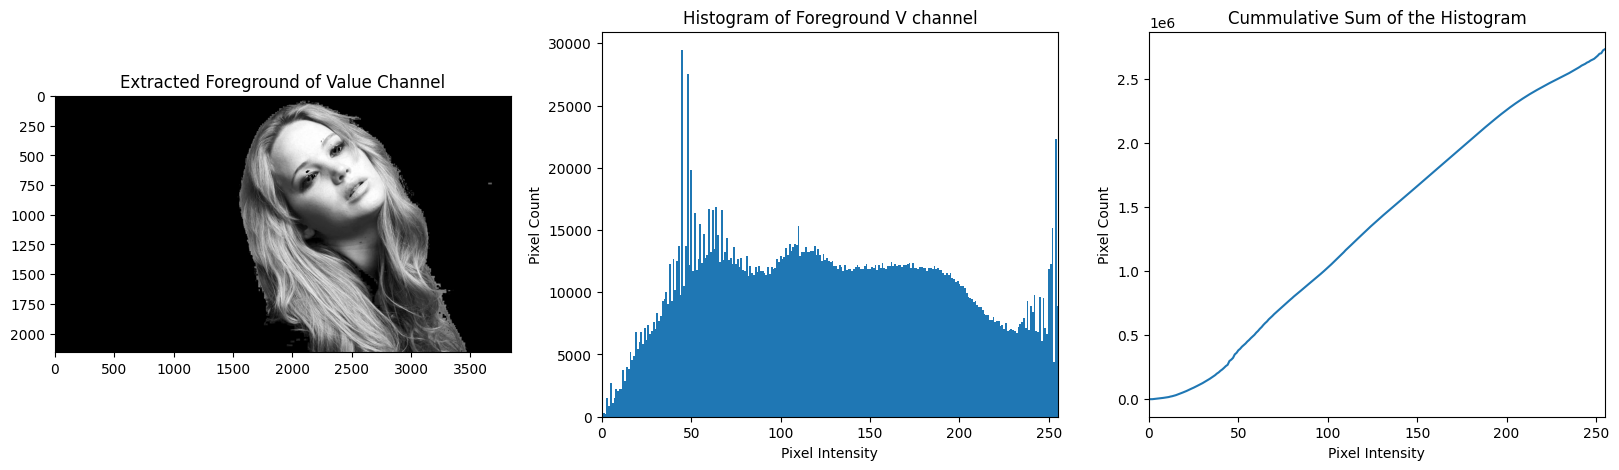

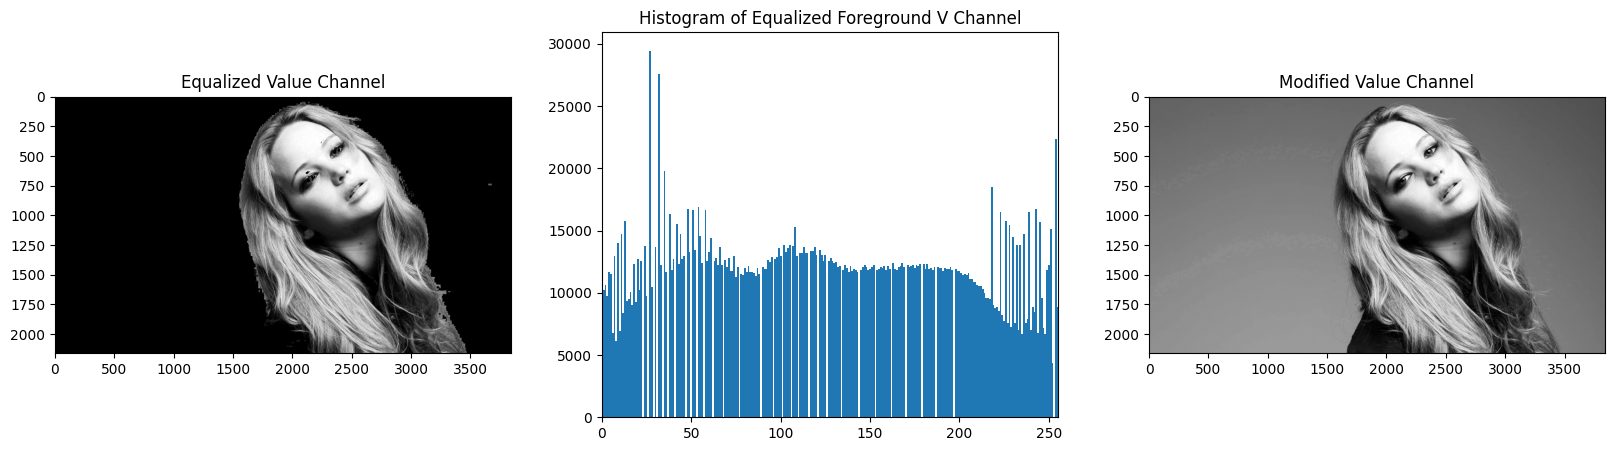

In [104]:
#Histogram Equalization for extranced foreground of the value channel
foreground_v = cv.bitwise_and(V,V,mask=mask)

plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
plt.imshow(foreground_v, cmap='gray')
plt.title('Extracted Foreground of Value Channel')

hist = cv.calcHist([foreground_v], [0], mask, [256], [0,256])

plt.subplot(1,3,2)
plt.bar(np.arange(256), hist.flatten(), width=1)  #Pixels with value 0 is significantly high, So neglect 0
plt.title("Histogram of Foreground V channel")
plt.xlabel("Pixel Intensity")
plt.ylabel("Pixel Count")
plt.xlim(0,255)

cum = np.cumsum(hist.flatten())
plt.subplot(1,3,3)
plt.plot(np.arange(256), cum)  #Pixels with value 0 is significantly high, So neglect 0
plt.title("Cummulative Sum of the Histogram")
plt.xlabel("Pixel Intensity")
plt.ylabel("Pixel Count")
plt.xlim(0,255)

#Apply equalization to the value channel
num_of_pixels = cum[-1]
transform = (255*cum/num_of_pixels).astype(np.uint8)
v_equalized = transform[foreground_v]        

plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
plt.imshow(v_equalized, cmap='gray')
plt.title('Equalized Value Channel')

hist_eq = cv.calcHist([v_equalized], [0], mask, [256], [0,256])

plt.subplot(1,3,2)
plt.bar(np.arange(256), hist_eq.flatten(), width=1)
plt.xlim(0,255)
plt.title('Histogram of Equalized Foreground V Channel')

background_v = cv.bitwise_and(V,V,mask=cv.bitwise_not(mask))

modified_v = cv.add(v_equalized, background_v)
 
plt.subplot(1,3,3)
plt.imshow(modified_v, cmap='gray')
plt.title("Modified Value Channel")
plt.show()

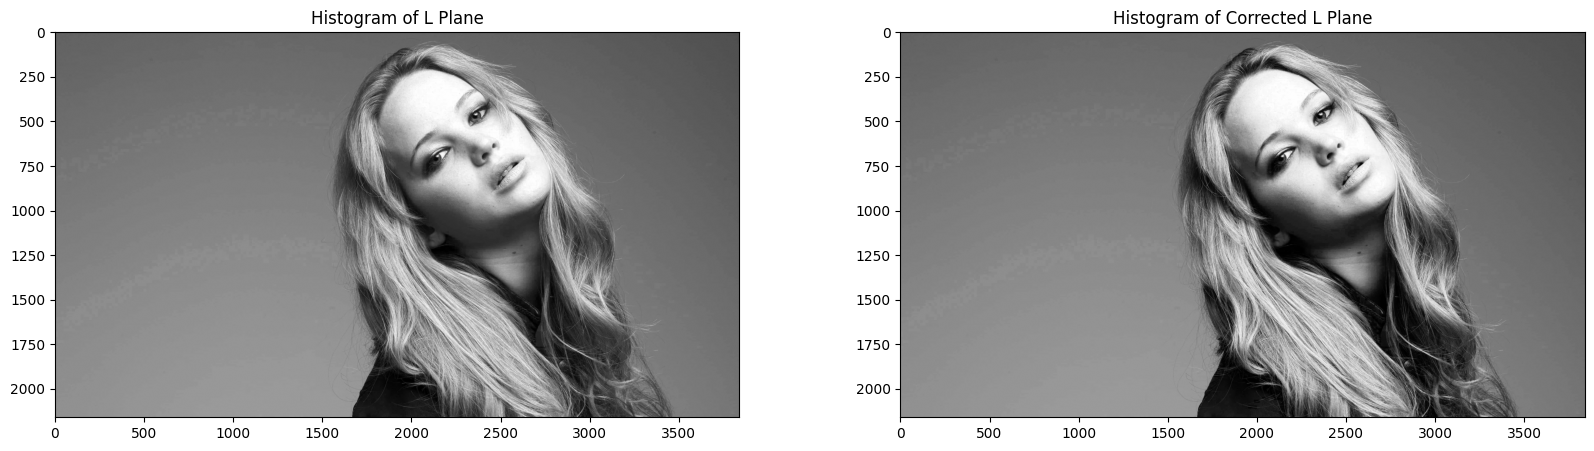

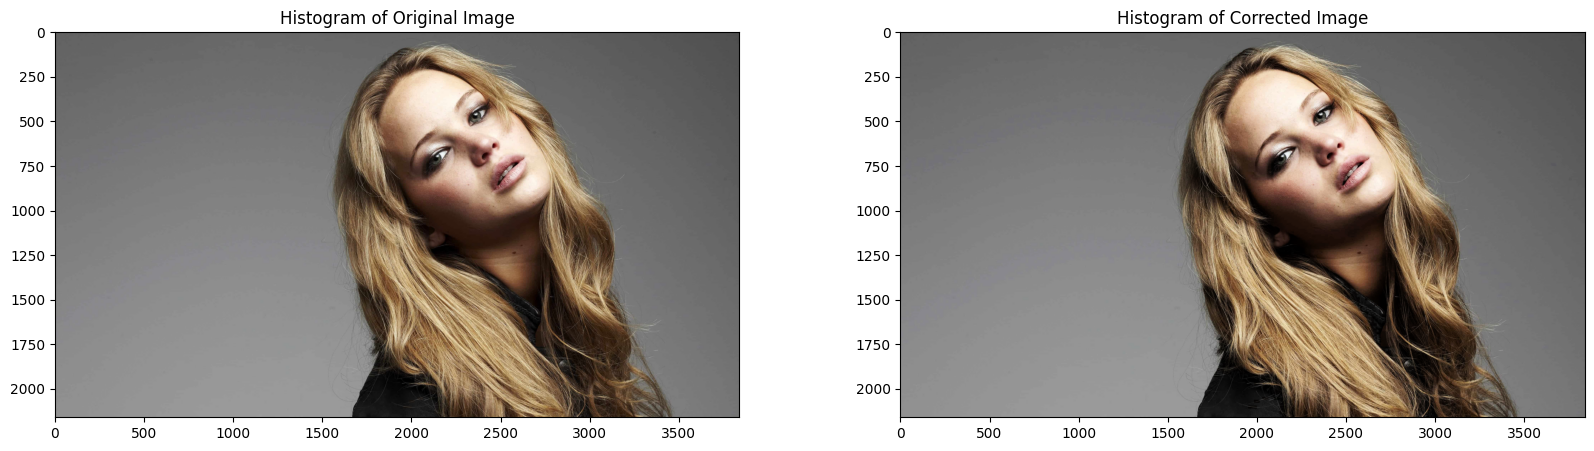

In [111]:
#Display Images
plt.figure(figsize=(20,5))

plt.subplot(121); plt.imshow(V, cmap='gray'); plt.title("Histogram of L Plane")
plt.subplot(122); plt.imshow(modified_v, cmap='gray'); plt.title("Histogram of Corrected L Plane")

plt.figure(figsize=(20,5))

plt.subplot(121); plt.imshow(img_jeniffer[:,:,::-1]); plt.title("Histogram of Original Image")

modified_img_jeniffer_hsv = cv.merge((H, S, modified_v))
modified_img_jeniffer = cv.cvtColor(modified_img_jeniffer_hsv, cv.COLOR_HSV2BGR)

plt.subplot(122); plt.imshow(modified_img_jeniffer[:,:,::-1]); plt.title("Histogram of Corrected Image")

plt.show()


#### **07. Filtering with Sobel Operator**

In [ ]:
img_einstein = cv.imread("a1images/a1images/einstein.png",0)
assert img_einstein is not None

sobel_x = np.array([[-1, 0, 1],
                    [-2, 0, 2], 
                    [-1, 0, 1]])
sobel_y = np.array([[-1, -2, -1],
                    [0, 0, 0], 
                    [1, 2, 1]])

#Apply Sobel filter in x-direction
img_einstein_x = cv.filter2D(img_einstein, cv.CV_64F, sobel_x)
#Apply sobel filter in y-direction
img_einstein_y = cv.filter2D(img_einstein, cv.CV_64F, sobel_y)

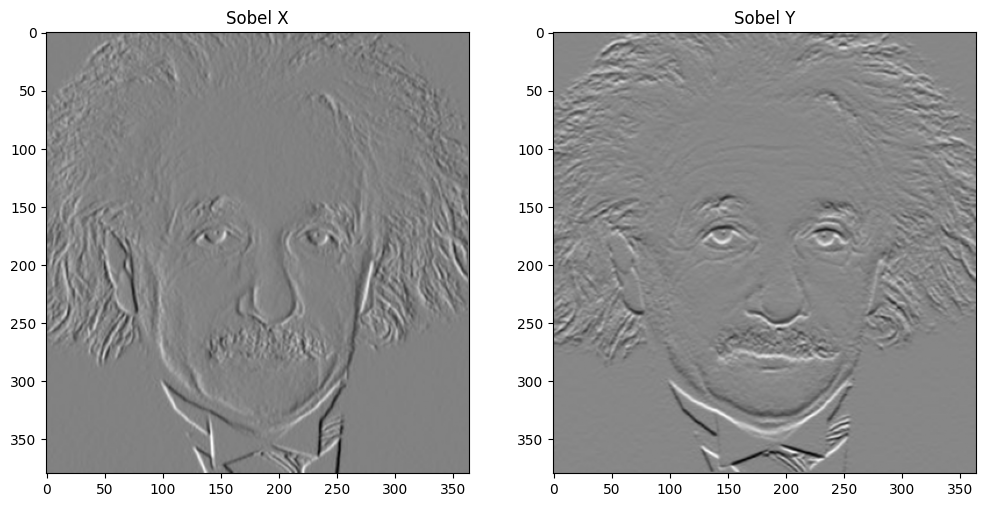

In [128]:
fig, ax = plt.subplots(1,2, figsize=(12,8))

ax[0].imshow(img_einstein_x, cmap='gray')
ax[0].set_title("Sobel X")

ax[1].imshow(img_einstein_y, cmap='gray')
ax[1].set_title("Sobel Y")

plt.show()

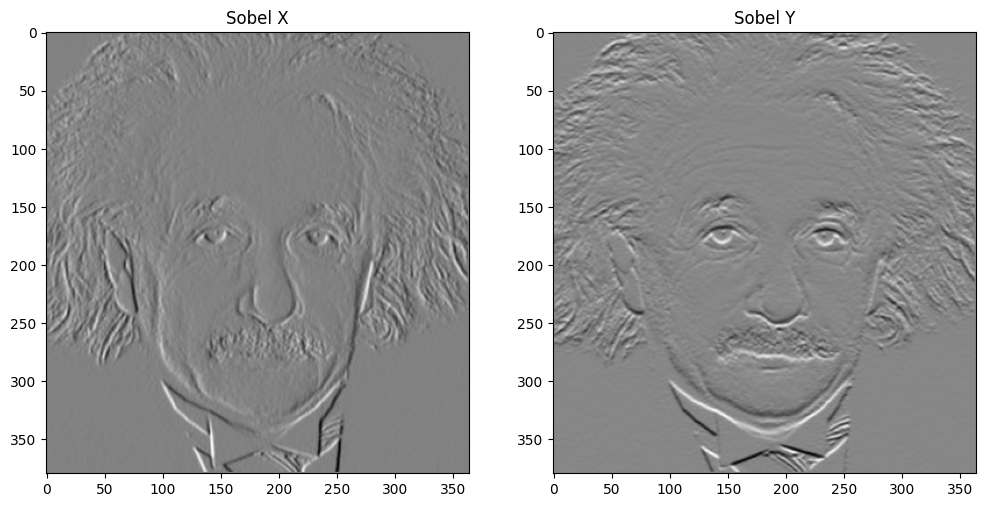

In [130]:
def filter_sobel(img, filter):
  '''Input image and filter as a numpy arrays. 
  And apply 2D Correlation for filtering. 
  Mathematically this should be done using convolution,
  but since most of the filters we using are symmetric
  in at least 1 axis, generally done using correlation
  '''
  [rows, columns] = np.shape(img)
  filtered_img = np.zeros(shape=(rows, columns))
  #Apply 2D Correlation
  for i in range(rows-2):
    for j in range(columns-2):
      value = np.sum(np.multiply(filter, img[i:i+3,j:j+3]))
      filtered_img[i+1,j+1] = value

  return filtered_img

#Apply Sobel filter in x-direction
img_einstein_x = filter_sobel(img_einstein, sobel_x)
#Apply sobel filter in y-direction
img_einstein_y = filter_sobel(img_einstein, sobel_y)

fig, ax = plt.subplots(1,2, figsize=(12,8))

ax[0].imshow(img_einstein_x, cmap='gray')
ax[0].set_title("Sobel X")

ax[1].imshow(img_einstein_y, cmap='gray')
ax[1].set_title("Sobel Y")

plt.show()


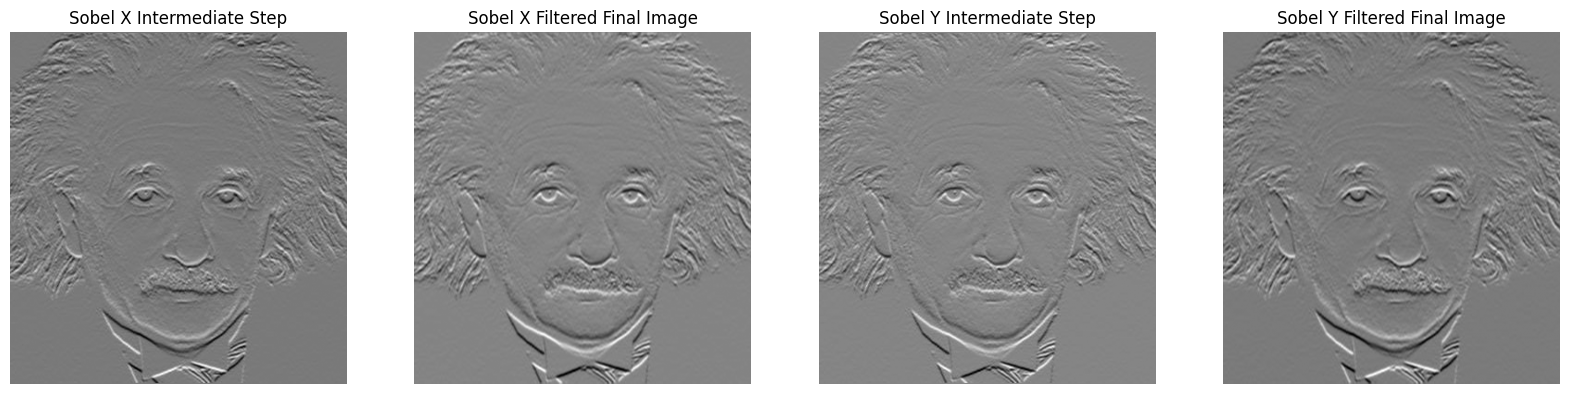

In [141]:
#Sobel x filter
sobel_x_vertical = np.array([[-1], [-2], [-1]])
sobel_x_horizontal = np.array([1, 0, -1])

#Subel y filtering
sobel_y_vertical = np.array([[-1], [0], [1]])
sobel_y_horizontal = np.array([-1, -2, -1])

# Apply the vertical and horizontal filters consecutively
x_mid = cv.filter2D(img_einstein, cv.CV_64F, sobel_x_horizontal)
x_sobel_filtered_image = cv.filter2D(x_mid, cv.CV_64F, sobel_x_vertical)

y_mid = cv.filter2D(img_einstein, cv.CV_64F, sobel_y_vertical)
y_sobel_filtered_image = cv.filter2D(y_mid, cv.CV_64F, sobel_y_horizontal)

# Create the figure for plotting
fig, ax = plt.subplots(1, 4, figsize=(20, 8))

ax[0].imshow(x_mid, cmap='gray')
ax[0].set_title('Sobel X Intermediate Step')
ax[0].axis("off")
ax[1].imshow(x_sobel_filtered_image, cmap='gray')
ax[1].set_title('Sobel X Filtered Final Image')
ax[1].axis("off")
ax[2].imshow(y_mid, cmap='gray')
ax[2].set_title('Sobel Y Intermediate Step')
ax[2].axis("off")
ax[3].imshow(y_sobel_filtered_image, cmap='gray')
ax[3].set_title('Sobel Y Filtered Final Image')
ax[3].axis("off")

plt.show()